In [ ]:
import numpy as np

#random number 0 t0 1 with 0.01 step
p1 = np.random.uniform(0, 1, 100)
p2 = np.random.uniform(0, 1, 100)
p3 = 1 - p1 - p2


array([0.18860788, 0.46719065, 0.66399213, 0.14855345, 0.86761412,
       0.78886847, 0.01529499, 0.36031791, 0.47741619, 0.10153486,
       0.43594118, 0.21694371, 0.61109348, 0.3286383 , 0.33784936,
       0.34990689, 0.34627909, 0.19972593, 0.52642192, 0.18893703,
       0.75233956, 0.93223704, 0.45831844, 0.35262394, 0.4010344 ,
       0.87641231, 0.28688294, 0.87652582, 0.98989899, 0.98857207,
       0.26891402, 0.07508669, 0.95807525, 0.70357562, 0.63734492,
       0.7005222 , 0.64324793, 0.0988661 , 0.66286214, 0.06172779,
       0.06292607, 0.69823881, 0.61679795, 0.24415073, 0.31073607,
       0.61540402, 0.5984892 , 0.68742418, 0.36246696, 0.9263578 ,
       0.88477057, 0.34158218, 0.11052583, 0.74600259, 0.59194002,
       0.69683859, 0.90017155, 0.14570544, 0.84060672, 0.36180057,
       0.68884407, 0.96907158, 0.48613023, 0.33274714, 0.29640917,
       0.78899947, 0.91008381, 0.02053423, 0.27986494, 0.94185399,
       0.10334598, 0.11635873, 0.04634303, 0.55970257, 0.32056

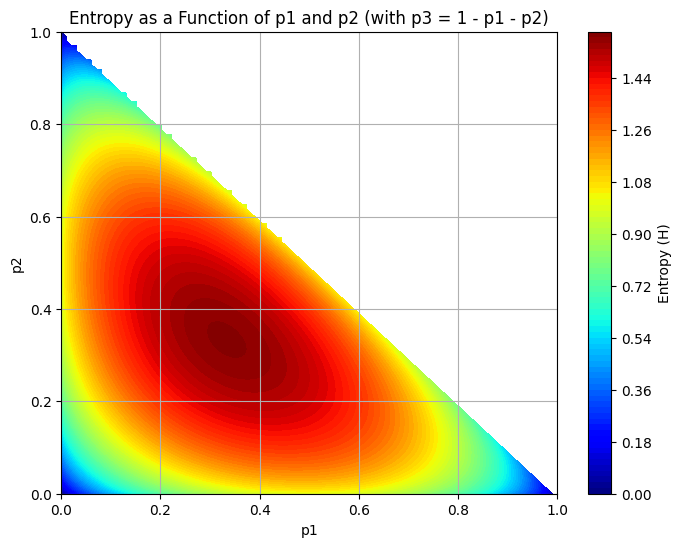

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute entropy for a given probability vector [p1, p2, p3]
def entropy(p):
    # Avoid log(0) by replacing 0 with a small positive number
    p = np.clip(p, 1e-10, None)
    return -np.sum(p * np.log2(p))

# Generate possible probability vectors
# Define a grid of values for p1 and p2 in the range [0, 1], with step size 0.01
p1_vals = np.linspace(0, 1, 100)
p2_vals = np.linspace(0, 1, 100)

# Create a meshgrid of p1 and p2
p1, p2 = np.meshgrid(p1_vals, p2_vals)

# Calculate p3 such that p1 + p2 + p3 = 1
p3 = 1 - p1 - p2

# Mask invalid probability vectors where p3 < 0
valid_mask = p3 >= 0

#Compute entropy only for valid probability vectors
entropy_vals = np.zeros_like(p1)
for i in range(p1.shape[0]):
    for j in range(p1.shape[1]):
        if valid_mask[i, j]:
            p_vec = [p1[i, j], p2[i, j], p3[i, j]]
            entropy_vals[i, j] = entropy(p_vec)
        else:
            entropy_vals[i, j] = np.nan  # Set invalid regions to NaN


# Plot the entropy heatmap
plt.figure(figsize=(8, 6))
plt.contourf(p1, p2, entropy_vals, cmap='jet', levels=100)
plt.colorbar(label='Entropy (H)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Entropy as a Function of p1 and p2 (with p3 = 1 - p1 - p2)')
plt.grid(True)
plt.show()



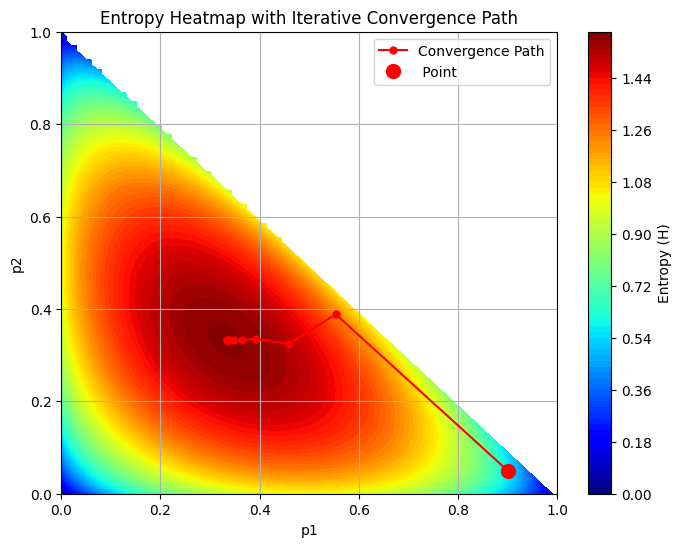

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute entropy for a given probability vector [p1, p2, p3]
def entropy(p):
    p = np.clip(p, 1e-10, None)  # Avoid log(0)
    return -np.sum(p * np.log2(p))  # Compute entropy over the last axis

# Generate possible probability vectors for the heatmap
p1_vals = np.linspace(0, 1, 100)
p2_vals = np.linspace(0, 1, 100)
p1, p2 = np.meshgrid(p1_vals, p2_vals)
p3 = 1 - p1 - p2

# Create a 3D array to hold p1, p2, p3 as the third dimension
p = np.stack([p1, p2, p3], axis=2)

# Mask invalid probability vectors where p3 < 0
valid_mask = p3 >= 0

entropy_vals = np.zeros_like(p1)
for i in range(p1.shape[0]):
    for j in range(p1.shape[1]):
        if valid_mask[i, j]:
            p_vec = [p1[i, j], p2[i, j], p3[i, j]]
            entropy_vals[i, j] = entropy(p_vec)
        else:
            entropy_vals[i, j] = np.nan  # Set invalid regions to NaN


# Initial probability vector where one element is significantly higher
p_current = np.array([0.9, 0.05, 0.05])

# Store the history of probability vectors for plotting
history_p1 = [p_current[0]]
history_p2 = [p_current[1]]
iterations = 10  # Number of iterations

# Define the averaging and normalization process
def iterative_update(p):
    # Averaging with neighbors
    new_p = np.zeros_like(p)
    new_p[0] = (p[0] + p[1]) / 2
    new_p[1] = (p[0] + p[1] + p[2]) / 3
    new_p[2] = (p[1] + p[2]) / 2
    return new_p / np.sum(new_p)

# Perform iterations
for i in range(iterations):
    # Update the probability vector
    p_current = iterative_update(p_current)

    # Store the current values of p1 and p2
    history_p1.append(p_current[0])
    history_p2.append(p_current[1])

# Plot the heatmap and the convergence points
plt.figure(figsize=(8, 6))
plt.contourf(p1, p2, entropy_vals, cmap='jet', levels=100)
plt.colorbar(label='Entropy (H)')

# Plot the red dots for each step in the iterative process
plt.plot(history_p1, history_p2, 'ro-', markersize=5, label='Convergence Path')

# Plot the initial point with a larger marker
plt.plot(history_p1[0], history_p2[0], 'ro', markersize=10, label=' Point')

# Labels and title
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Entropy Heatmap with Iterative Convergence Path')
plt.legend()
plt.grid(True)
plt.show()
